## Creating Visualization from a Shapefile

### Import Modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from descartes import PolygonPatch
import seaborn
from shapely.geometry import MultiPolygon, shape
from fiona import collection
import fiona
import pandas
import random
import datetime

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
seaborn.set()

### Import Data

In [3]:
data = pandas.read_excel('/users/danielcorcoran/desktop/github_repos/python_nb_visualization/data/lgaprofiles15.xlsx',
                        sheet_name = "LGAs")

In [4]:
print(data.columns)
print(data.shape)

Index(['LGA Name', 'LGA Code', 'Departmental Region', 'Departmental Area',
       'Area of LGA (km2)', 'Most populous community', 'Distance to Melbourne',
       'Travel time to Melbourne', 'Remoteness area', 'Commercial land use',
       ...
       'Average patient contribution for prescriptions',
       'Average patient contribution for prescriptions (rank)',
       'HACC clients aged less than 65 years per 1,000 target population',
       'HACC clients aged less than 65 years per 1,000 target population (rank)',
       'HACC clients aged 65 years and over per 1,000 target population',
       'HACC clients aged 65 years and over per 1,000 target population (rank)',
       'Clients that received Alcohol & Drug Treatment Services per 1,000 population',
       'Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)',
       'Registered mental health clients per 1,000 population',
       'Registered mental health clients per 1,000 population (rank)'],
      d

In [5]:
data.shape

(80, 404)

In [6]:
data2 = data[data["LGA Name"] != 'Victoria']
data3 = data2.dropna(how = "any", axis = 1)

In [7]:
data3.head(10)

,LGA Name,LGA Code,Departmental Region,Departmental Area,Area of LGA (km2),Most populous community,Distance to Melbourne,Travel time to Melbourne,Remoteness area,Commercial land use,...,Males receiving prescriptions,Males receiving prescriptions (rank),Average patient contribution for prescriptions,Average patient contribution for prescriptions (rank),"HACC clients aged less than 65 years per 1,000 target population","HACC clients aged less than 65 years per 1,000 target population (rank)","HACC clients aged 65 years and over per 1,000 target population","HACC clients aged 65 years and over per 1,000 target population (rank)","Registered mental health clients per 1,000 population","Registered mental health clients per 1,000 population (rank)"
0,Alpine (S),20110.0,Hume,Ovens Murray,"4,787.0",Myrtleford,286 km,3 hours 21 minutes,Outer Regional Australia,0.0%,...,67.4%,43.0,$8.29,55.0,265.3,57.0,"1,026.5",32.0,19.1,15.0
1,Ararat (RC),20260.0,Grampians,Central Highlands,"4,210.0",Ararat,200 km,2 hours 23 minutes,Outer Regional Australia,0.0%,...,68.8%,32.0,$8.04,65.0,657.7,10.0,"1,135.4",20.0,26.7,3.0
2,Ballarat (C),20570.0,Grampians,Central Highlands,739.0,Wendouree,115 km,1 hour 16 minutes,Inner Regional Australia,0.3%,...,65.1%,55.0,$8.57,46.0,224.8,71.0,788.2,57.0,18.5,17.0
3,Banyule (C),20660.0,Northern Metropolitan,North Eastern Melbourne,63.0,Greensborough,23 km,25 minutes,Major Cities of Australia,1.1%,...,66.2%,50.0,$9.47,20.0,386.8,32.0,794.1,55.0,10.4,61.0
4,Bass Coast (S),20740.0,Gippsland,Inner Gippsland,865.0,Wonthaggi,130 km,1 hour 51 minutes,Inner Regional Australia,0.1%,...,67.2%,44.0,$7.69,76.0,496.7,19.0,"1,244.6",15.0,15.7,24.0
5,Baw Baw (S),20830.0,Gippsland,Inner Gippsland,"4,031.0",Warragul,102 km,1 hour 14 minutes,Inner Regional Australia,0.0%,...,66.5%,47.0,$8.51,48.0,273.5,55.0,973.0,36.0,11.8,53.0
6,Bayside (C),20910.0,Southern Metropolitan,Bayside Peninsula,37.0,Brighton,12 km,15 minutes,Major Cities of Australia,3.3%,...,63.6%,60.0,$11.08,5.0,440.1,26.0,"1,038.0",31.0,7.2,76.0
7,Benalla (RC),21010.0,Hume,Ovens Murray,"2,352.0",Benalla,199 km,2 hours 16 minutes,Inner Regional Australia,0.0%,...,68.8%,31.0,$8.08,63.0,268.5,56.0,982.7,35.0,26.3,4.0
8,Boroondara (C),21110.0,Eastern Metropolitan,Inner Eastern Melbourne,60.0,Glen Iris,12 km,13 minutes,Major Cities of Australia,3.2%,...,59.2%,72.0,$12.07,3.0,469.7,23.0,774.2,60.0,7.9,71.0
9,Brimbank (C),21180.0,Western Metropolitan,Brimbank Melton,123.0,St Albans,19 km,19 minutes,Major Cities of Australia,1.7%,...,67.7%,40.0,$8.24,58.0,175.8,76.0,391.9,78.0,12.0,52.0


In [8]:
ranks = [column for column in data3.columns if 'rank' in column]

In [9]:
ranks.append('LGA Code')

In [10]:
data4 = data3[ranks]

In [11]:
data4.shape

(79, 159)

In [12]:
data4.head()

,"Actual annual population change, 2004 - 2014 (rank)","Projected annual population change, 2014 - 2024 (rank)",Total fertility rate (rank),People of Aboriginal and Torres Strait Islander origin (rank),People born overseas (rank),People born in a non-English speaking country (rank),People who speak a language other than English at home (rank),People with low English proficiency (rank),People who believe multiculturalism makes life better (rank),"Family violence incidents per 1,000 population (rank)",...,Specialist attendances bulk billed (rank),Diagnostic imaging services bulk billed (rank),People receiving prescriptions (rank),Females receiving prescriptions (rank),Males receiving prescriptions (rank),Average patient contribution for prescriptions (rank),"HACC clients aged less than 65 years per 1,000 target population (rank)","HACC clients aged 65 years and over per 1,000 target population (rank)","Registered mental health clients per 1,000 population (rank)",LGA Code
0,68.0,68.0,50.0,44.0,33.0,31.0,32.0,32.0,11.0,67.0,...,69.0,33.0,54.0,61.0,43.0,55.0,57.0,32.0,15.0,20110.0
1,66.0,61.0,25.0,28.0,57.0,55.0,60.0,63.0,53.0,11.0,...,48.0,51.0,26.0,18.0,32.0,65.0,10.0,20.0,3.0,20260.0
2,19.0,16.0,51.0,19.0,58.0,48.0,46.0,44.0,35.0,19.0,...,60.0,34.0,46.0,42.0,55.0,46.0,71.0,57.0,17.0,20570.0
3,44.0,48.0,61.0,57.0,26.0,24.0,24.0,26.0,24.0,43.0,...,55.0,50.0,50.0,48.0,50.0,20.0,32.0,55.0,61.0,20660.0
4,16.0,11.0,20.0,45.0,32.0,38.0,39.0,39.0,46.0,15.0,...,56.0,56.0,33.0,25.0,44.0,76.0,19.0,15.0,24.0,20740.0


In [13]:
data5 = data4[['LGA Code', 
               'People with low English proficiency (rank)', 
               'People who believe multiculturalism makes life better (rank)']]

In [14]:
data5.head()

,LGA Code,People with low English proficiency (rank),People who believe multiculturalism makes life better (rank)
0,20110.0,32.0,11.0
1,20260.0,63.0,53.0
2,20570.0,44.0,35.0
3,20660.0,26.0,24.0
4,20740.0,39.0,46.0


In [15]:
original_columns = list(data5.columns)

In [16]:
original_columns

['LGA Code',
 'People with low English proficiency (rank)',
 'People who believe multiculturalism makes life better (rank)']

In [17]:
bins = 5

data5['low_english_profiency_bins'] = pandas.qcut(data5['People with low English proficiency (rank)'], 
                                        q= bins,labels = list(range(bins)))
data5['people_believe_multiculturalism_bins'] = pandas.qcut(data5['People who believe multiculturalism makes life better (rank)'], 
                                        q= bins,labels = list(range(bins)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
data5.tail()

,LGA Code,People with low English proficiency (rank),People who believe multiculturalism makes life better (rank),low_english_profiency_bins,people_believe_multiculturalism_bins
74,27170.0,41.0,30.0,2,1
75,27260.0,16.0,49.0,0,3
76,27350.0,9.0,2.0,0,0
77,27450.0,37.0,47.0,2,2
78,27630.0,71.0,64.0,4,4


### Import Shapefile and manipulate

In [19]:
shapepath = '/users/danielcorcoran/Desktop/github_repos/python_nb_data_spatial/data/LGA_ABS_16/LGA_2016_AUST.shp'

In [20]:
multipolygon = MultiPolygon([shape(p['geometry']).simplify(tolerance = 0.05) for p in fiona.open(shapepath) if p['geometry'] is not None 
                   and p['properties']['STE_NAME16'] == 'Victoria'])

### Set Colour Dictionary

In [21]:
cols5band = {'BrBg':['#a6611a','#dfc27d','#f5f5f5','#80cdc1','#018571'],
       'PiYG':['#d01c8b','#f1b6da','#f7f7f7','#b8e186','#4dac26'],
       'PRGn':['#7b3294','#c2a5cf','#f7f7f7','#a6dba0','#008837'],
       'PuOr':['#7b3294','#c2a5cf','#f7f7f7','#a6dba0','#008837'],
       'RdBu':['#ca0020','#f4a582','#f7f7f7','#92c5de','#0571b0'],
       'RdGy':['#ca0020','#f4a582','#ffffff','#bababa','#404040'],
       'RdYlBu':['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6'],
       'RdYlGn':['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],
        'Spectral':['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'],
        'PuRd':['#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'],
        'RdPu':['#feebe2','#fbb4b9','#f768a1','#c51b8a','#7a0177'],
        'YlGn':['#ffffcc','#c2e699','#78c679','#31a354','#006837'],
        'YlGnBu':['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494'],
        'YlOrRd':['#ffffb2','#fecc5c','#fd8d3c','#f03b20','#bd0026']}

In [39]:
# Set the colour key
key = 'PRGn'
colours = cols5band[key]

In [40]:
colours

['#7b3294', '#c2a5cf', '#f7f7f7', '#a6dba0', '#008837']

### Generate, plot and save

In [41]:
columns = [column for column in data5.columns if column not in original_columns]

### Figure Settings

In [42]:
fig_width = 16
fig_height = 12
linewidth = 0.22
alpha = 1
border_colour = 'black'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Heltevitica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


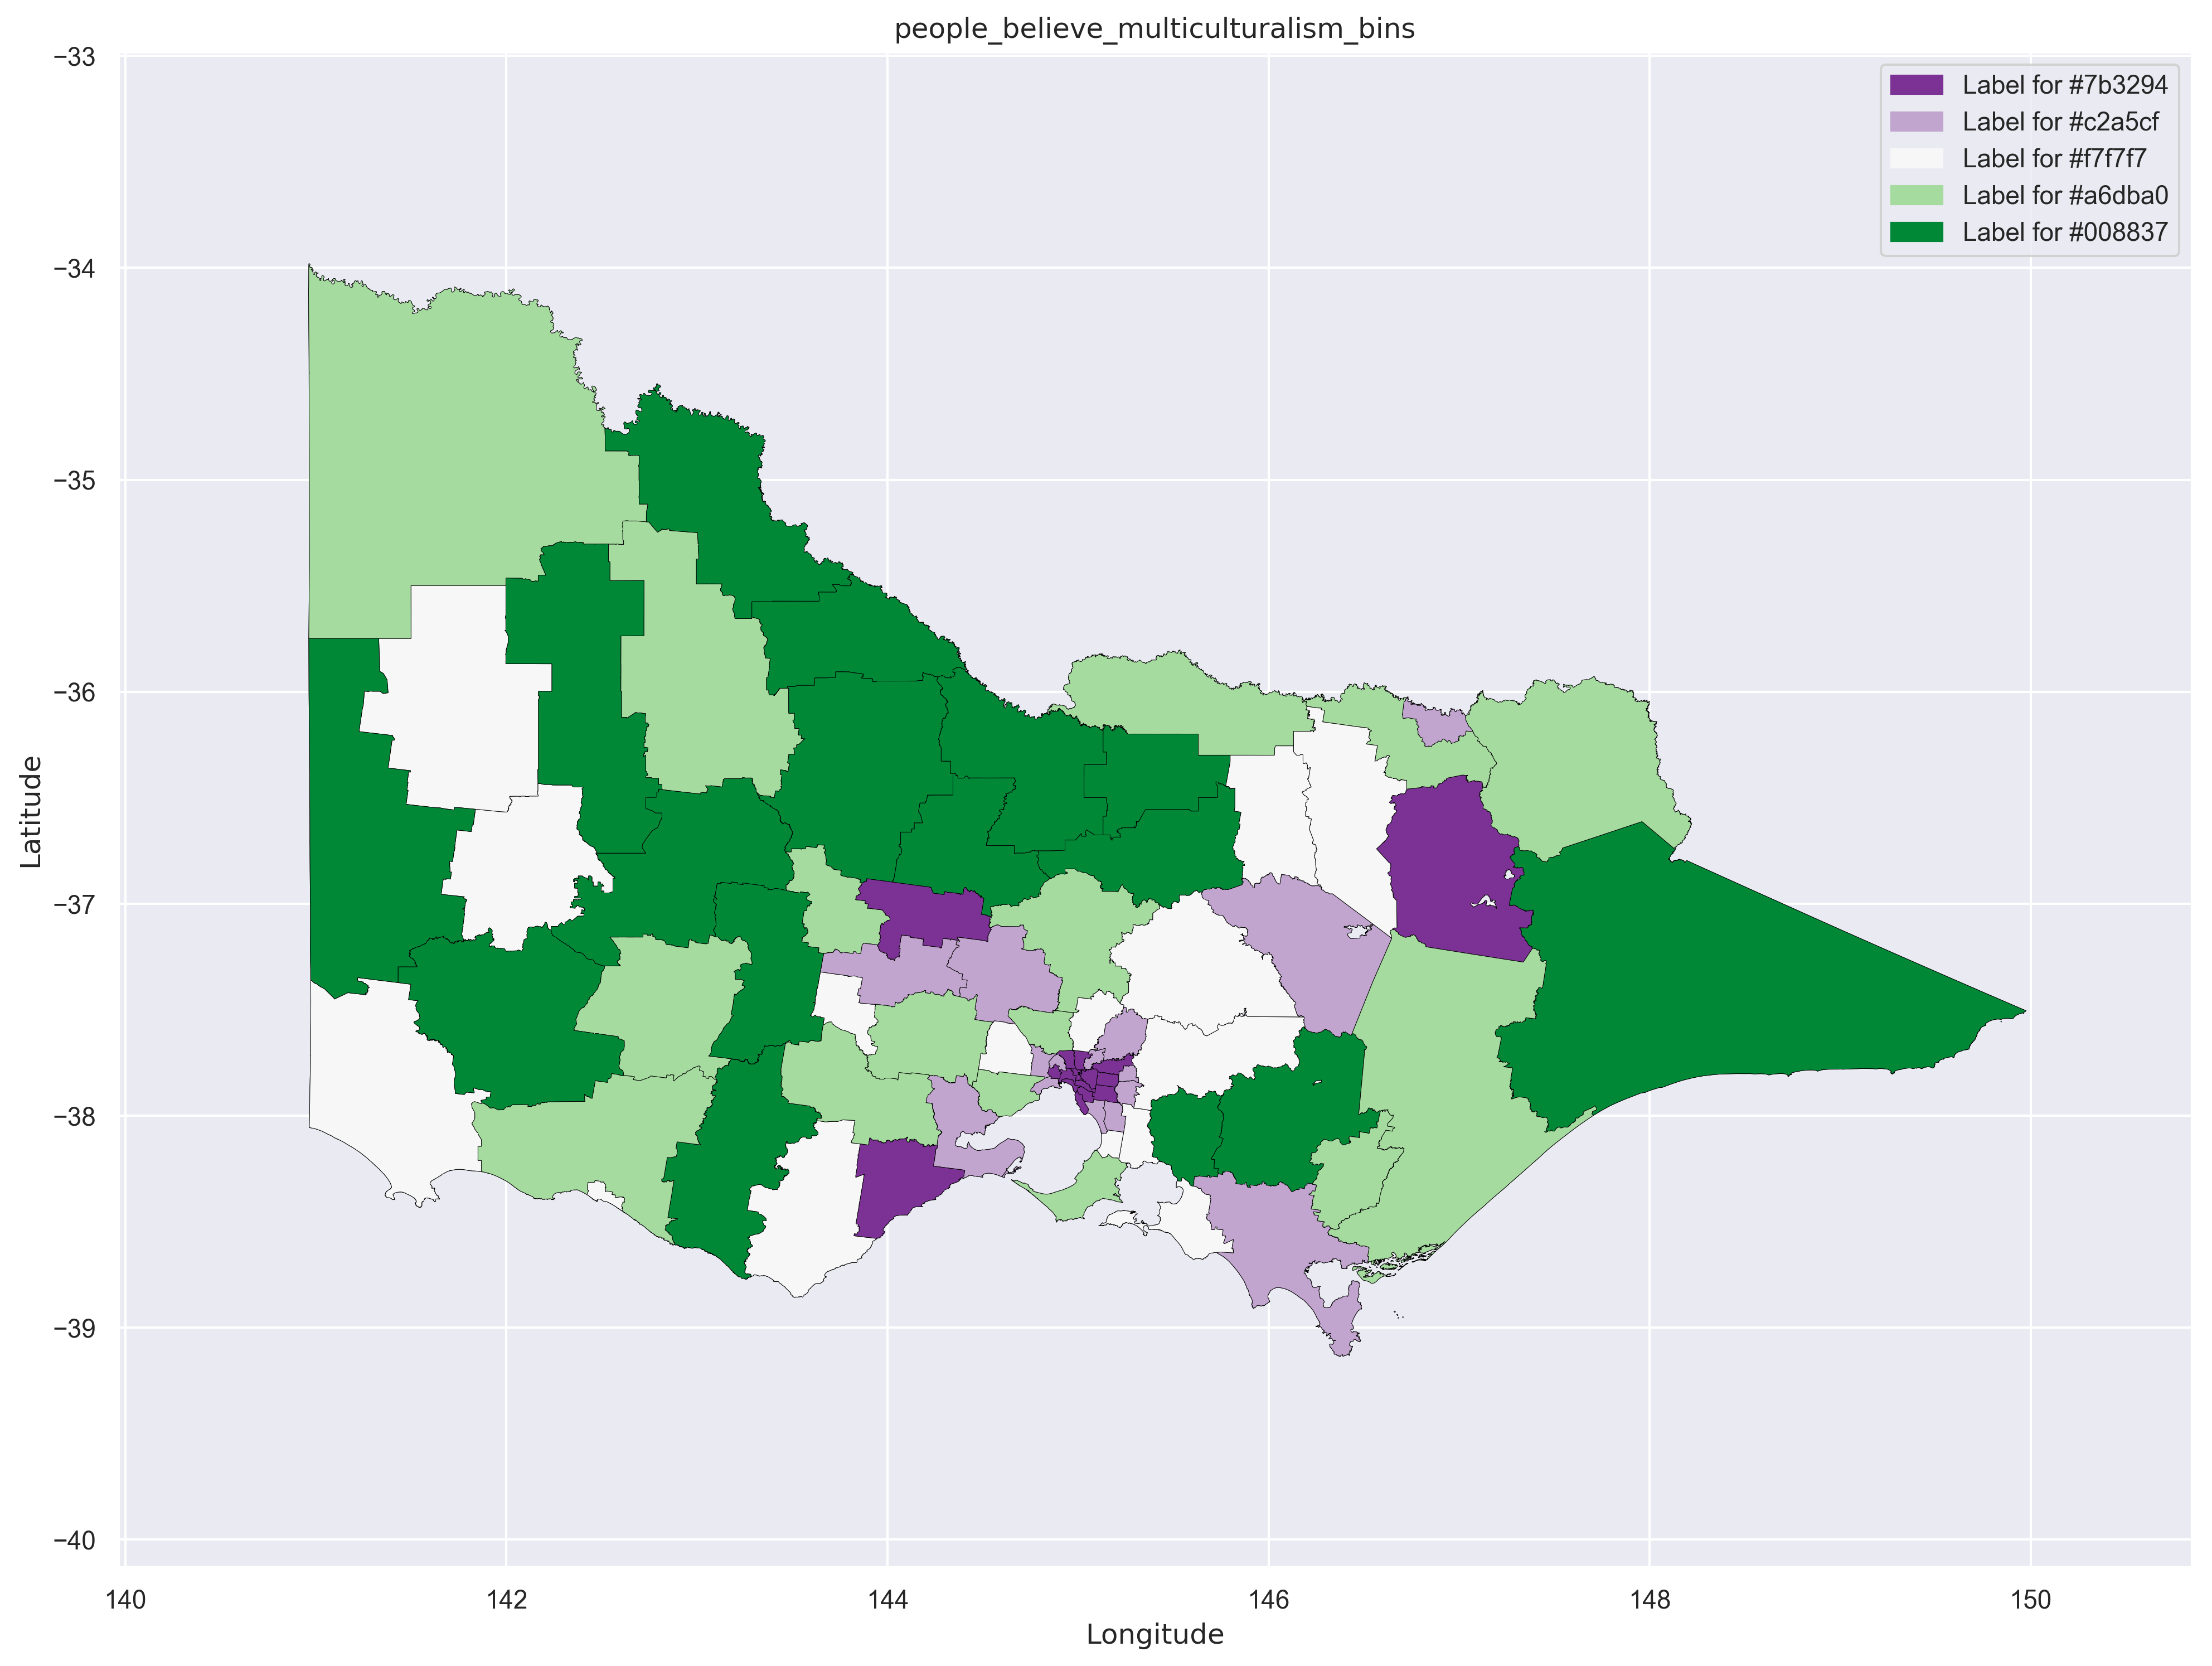

In [43]:
for column in columns:

    fig = plt.figure(1, figsize=(fig_width, fig_height), dpi=300)
    
    ax = fig.add_subplot(111)

    with collection(shapepath, "r") as input:
        for pol in input:
            if pol['geometry'] is not None and pol['properties']['STE_NAME16'] == 'Victoria':
                
                lga_code = float(pol['properties']['LGA_CODE16'])
                if lga_code in list(data5['LGA Code']):

                    row = data5[data5['LGA Code'] == lga_code]
                    row2 = row.reset_index(drop = True)
                    colour_code = row2.loc[0, column]
                    shape_colour = colours[colour_code]

                    ax.add_patch(PolygonPatch(pol['geometry'], 
                                 fc= shape_colour, 
                                 ec=border_colour, 
                                 linewidth = linewidth, 
                                 alpha=alpha ))

    xMin, yMin, xMax, yMax  = multipolygon.bounds
    offset = 1
    ax.set_xlim(xMin + -offset, xMax + offset)
    ax.set_ylim(yMin - offset, yMax + offset)

    font = {'fontname':'Heltevitica'}
    ax.set_xlabel('Longitude', **font)
    ax.set_ylabel('Latitude', **font)
    ax.set_title(column, **font)

    # Create Legend
    handles = [mpatches.Patch(color = colour, label = 'Label for {}'.format(colour)) for colour in colours]
    plt.legend(handles=handles)

    # Export to .svg
    # Create timestamp
    ts = datetime.datetime.now().strftime('%y%m%d%H%M%S')
    # Implant timestamp and key to filename
    fig.savefig('/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_exports/LGA_VIC16_{}_{}.png'.format(key,ts))
